# Baseball Case Study
### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

## First we are going to import all the important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Let's first import the data file of base ball case study
baseball_data = pd.read_csv('baseball.csv')
baseball_data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratery Data Analysis

Let's start the very first and most important in machine learning model building that is EDA(Exploratery Data Analysis)

In [4]:
# checking the shape of data
baseball_data.shape

(30, 17)

Interesting! The Base Ball data has only 30 rows and 17 columns, we will study each columns to see what these columns are all about later, first let's gather more information about the data.

In [5]:
# checking the data set information
baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


With the help of dot info method we fetched some important information about the data. Let's discuss these:

* We can see that all the columns have 30 ```non-null``` values, that means we do not have any missing values in our data set.
* All the column's data type is integer accept ```ERA``` it has float data type.
* no. of columns are 17.
* no. of rows are 30.

In [6]:
# checking the null values in columns 
baseball_data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
# list of all columns in data set
baseball_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Yeah! we do not have any null values in our data set.

So, while we have loaded the data set and checked for some information about the data, now let's look at the features of the data, let's discuss this:

* **W (WIN)** = **WIN** Indicates the number of win a team have in the season, this coulmn is our Label data and it is a continuous data so here we can interpret that we need to build a regression model for this data set which will predict the numbers of win of the particular team.

* **R (RUNS)** = **RUNS** columns tells us the data about total runs of a particular team in entire season. As we know the baseball game is all about the scoring runs, and the team who has higher runs in 9 innings wins the match. A player is awarded a run if he crosses the plate to score his team a run. When tallying runs scored, the way in which a player reached base is not considered. If a player reaches base by an error or a fielder's choice, as long as he comes around to score, he is still credited with a run. If a player enters the game as a pinch-runner and scores, he is also credited with a run.

* **AB (AT-BATS)** = In baseball games **AT-BATS (AB)** is a batter's turn betting against pitcher. An official At-Bat comes when a better reaches bases via (1) a fielder's choice. (2) by hit. (3) by an error (4) put-out on a non-sacrifice. Also At-Bat is different from Plate appearence.

* **H (HITS)** = **HIT** in baseball occurs when a batter strikes the ball into the fair territory and reaches base without an error or fielder's choice. There are four types of hits in baseball Singles, Doubles, Triples and Home Run.

* **2B (DOUBLES)** = **DOUBLES** are basically a batter get when he hits the ball into play area and reaches the second base without the help of an intervening error or an attempt to put out another baserunner.

* **3B (TRIPLES)** = **TRIPLES** are basically a batter get when he hits the ball into play area and reaches the 3rd base  without the help of an intervening error or attempt to put out another baserunner, this is a very rare in baseball as in attempts to reach 3rd base a batter covers almost 270 feet of running and most of the team is able to get the ball infield till the time a batter reaches the second base a triples are oftenly scored by a very fast runner batter and most of the time when batter hits the ball deeper into right field as it is hard to through the ball from right field to 3rd base.

* **HR (HOMERUNS)** = **HOMERUNS** occurs when a batter hits a fair ball and scores without being put out or without an error. In almost every instances of a home run, a batter hits the ball in the air over the outfield fence in fair territory and the batter is awarded all four bases and any runner on base scores as well.

* **BB (WALK or BASE ON BALLS)** = **WALK** occurs when pitcher throws four pitches out of the strike zone and hitter does not swing his bat in all 4 pitches in that case the hitter is awarded by the 1st base. He simply walks to the 1st base and another batter comes to the home plate for batting that's it is called a walk. Also note that when a picther throws the ball out of the strike zone and batter does not swing his bat it is considered as 1 ball and in for balls batter is awarded by a base that is why it's name is ***BASE ON BALLS***.

* **SO (STRIKEOUTS)** = **STRIKE OUT** is basically a batter is out after 3 strikes that means when a pitcher throws 3 balls into the strike zone( a square size box whose hight is batter's knee to belt and width is the size of plate) strike could happen in other ways as well like if batter hits the ball into the foul zone then it's a strike if batter has 0 and 1 strike but if batter has 2 strikes already then hitting ball into foul zone won't count as strike.

* **SB (STOLEN BASE)** = **STOLEN BASE** is a base score steel by the base runner, this happens when the base runner takes a base run which he is not entitled for while pitcher is taking a pickoff for throwing the ball or catcher is throwing ball back to picther or the ball is still in the hand of pitcher so in this case the ball is not hit by batter but the base runner some took a base run this is known as ***STOLEN BASE***.

* **RA (RUNS ALLOWED)** = **RUNS ALLOWED** is every run scored(earned runs & unearned runs) against the defensive team regardless of how the runs has been scored is known as ***RUNS ALLOWED***.

* **ER (EARNED RUNS)** = **EARNED RUNS** are the runs which is scores against the pitcher without the benefit of an error or a passed balls is known as ***EARNED RUNS***.

* **ERA (EARNED RUNS AVERAGE)** = **EARNED RUNS AVERAGE** represents the number of earned runs a pitcher allowed per innings. This is a statistical tools for eavaluating the ptcher's performance.

* **CG (COMPLETE GAMES)** = **COMPLETE GAMES** is a term which is earned by the picthers if they are the only pitcher who pitched in the entire innings of the game regardless of how long the game lasts. Complete games considered valuable in baseball because if a pitcher pitched the ball in entire game that means he really pitched well that is why he is allowed to pitch in entire game.

* **SHO (SHUTOUT)** = **SHUTOUT** is again a term for picthers, the pitcher who pitched for his team in entire game and does not allow the opposition team to score is awarded as the ***SHUTOUT*** 

* **SV (SAVE)** = **SAVE** is awarded to the relief pitchers who finishes the game for winning team under certain circumstances (1) enters the game with leads no more than 3 runs and pitch at least one inning. (2) enters the game with tying run in the on-deck circle, at the plates or on the bases. (3) Pitch at least 3 innings. A pitcher can not receive a save and win in the same game.

* **E (ERROR)** = **ERRORS** are given to the fielders if in the judgement of the official scorer fielder fails to convert an out on a play that an average player should have made. Fielders can also be given errors if the makes a poor play that allows one or more runners to advance on the bases. A batter does not necessarily need to reach base for a fielder to be given an error. If he drops a foul ball that extends an at-bat, that fielder can also be assessed an error.

In [8]:
# data description
baseball_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


After analyzing some important statistics of our data by above description method it has been noted that the data distribution of our baseball dataset is neither much sorted nor too much messy. Most of the data is distributed normally althogh there is some outliers in data on both side positive and negative. I have noted down the columns which are little bit complicated in terms of data distribution. Those columns are:
* **RUN** = This column has IQR gap 38 & 29 but 75% to max. gap is 173 and min. to 25% gap is 78 which shows data is more right skewed and also left skewed but less.
* **STRIKEOUT** = This column's data is little bit disturbed as it has IQR gap 104 & 50 but min to 25% gap is 184 and 75% to max. gap is 207 which is more roght skewed and almost equally left skewed.
* **COMPLETE GAMES** = This column has IQR gap of 2 and 2.75 but 75% to max. gap is 5.25 which right skewed and min. to 25% gap is 1 means not left skewed.
* **SHUTOUTS** = this column has IQR gap is 3 & 1 and 75% to max. gap is 8 which is right skewed and min. to 25% gap is 5 means little bit left skewed.
* **SAVES** = This column has IQR gap is 5 & 4 but min. to 25% gap is 9 and 75% to max. gap is 16 that means much skewed at right and also skewed to left.
* **ERRORS** = This column has min t0 25% gap is 11 and IQR gap is 5 & 5 but 75& to max. gap is 28 that means upto 75% the data is kind of normal but skewed at right too much.

Apart from these columns all the other columns are less complicated compare to these above mentioned column which we can consider a normal distribution.

We will plot the distribution plot to further analyze the data distribution and will see what else we can find.

## Data visualization

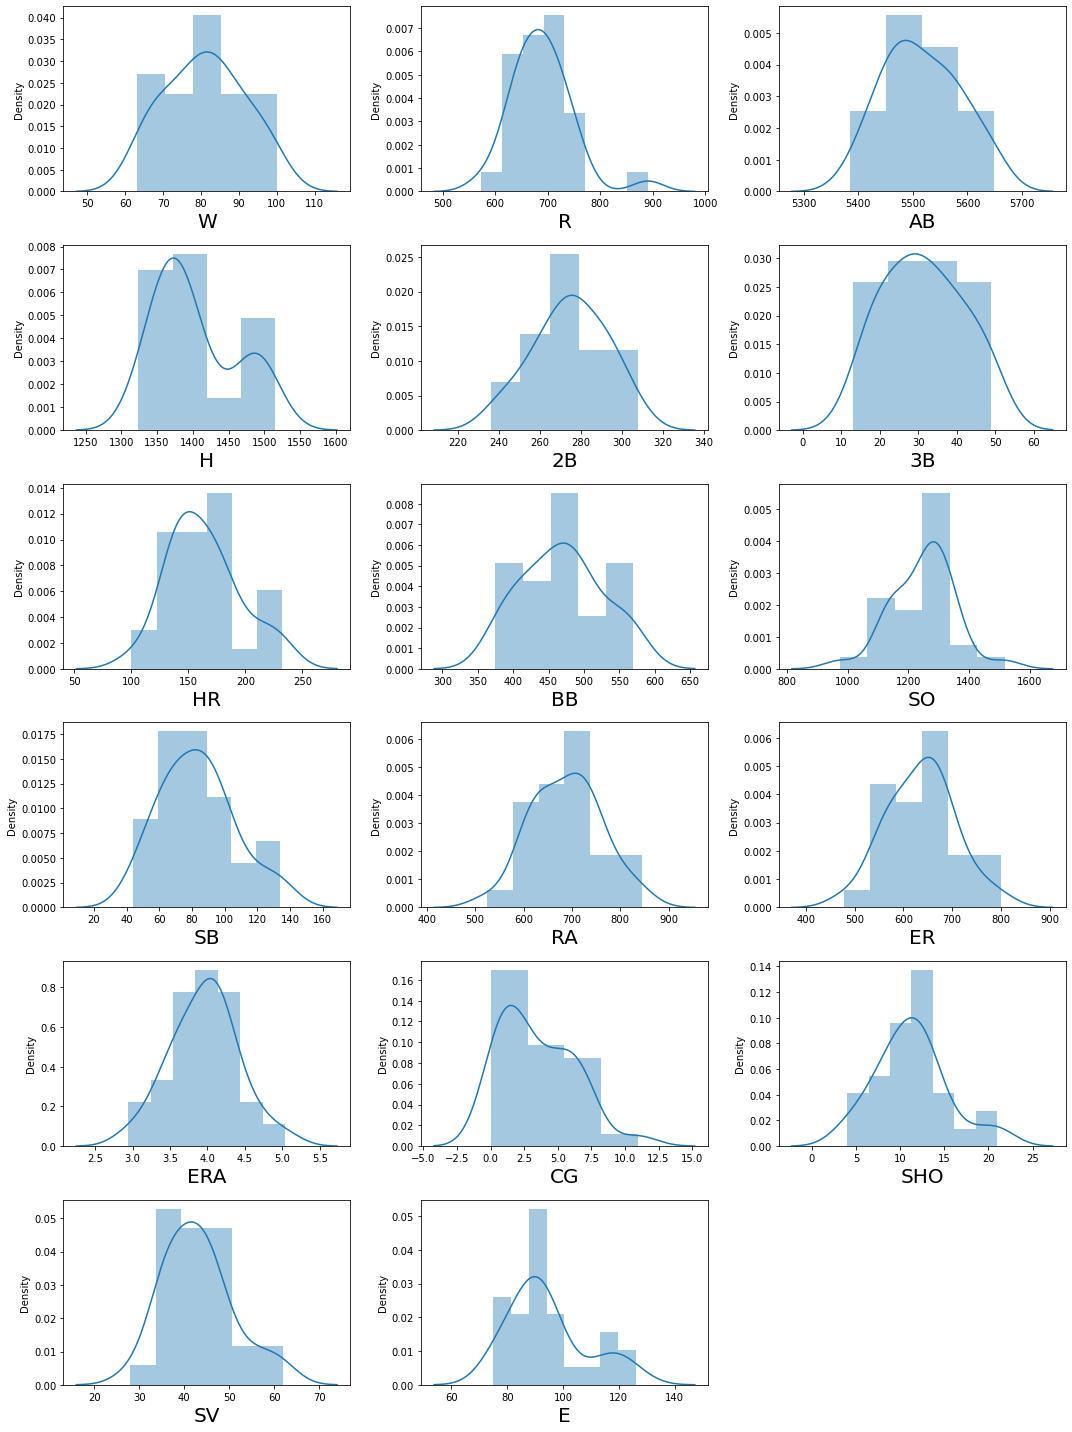

In [9]:
# plotting a distribution plot of all the columns of dataset with for loop
plt.figure(figsize = (15,20))
plotnumber = 1

for column in baseball_data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(baseball_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above Distribution plot we can see that almost all the column's data are normally distributed. What we interpreded about the skeweness throgh the data descriptions are some what true but we can see in the distribution plot that any columns does not have skeweness that much which is good for our data we will further check the outliers with the help of box plot if we will find any then we will deal with it.

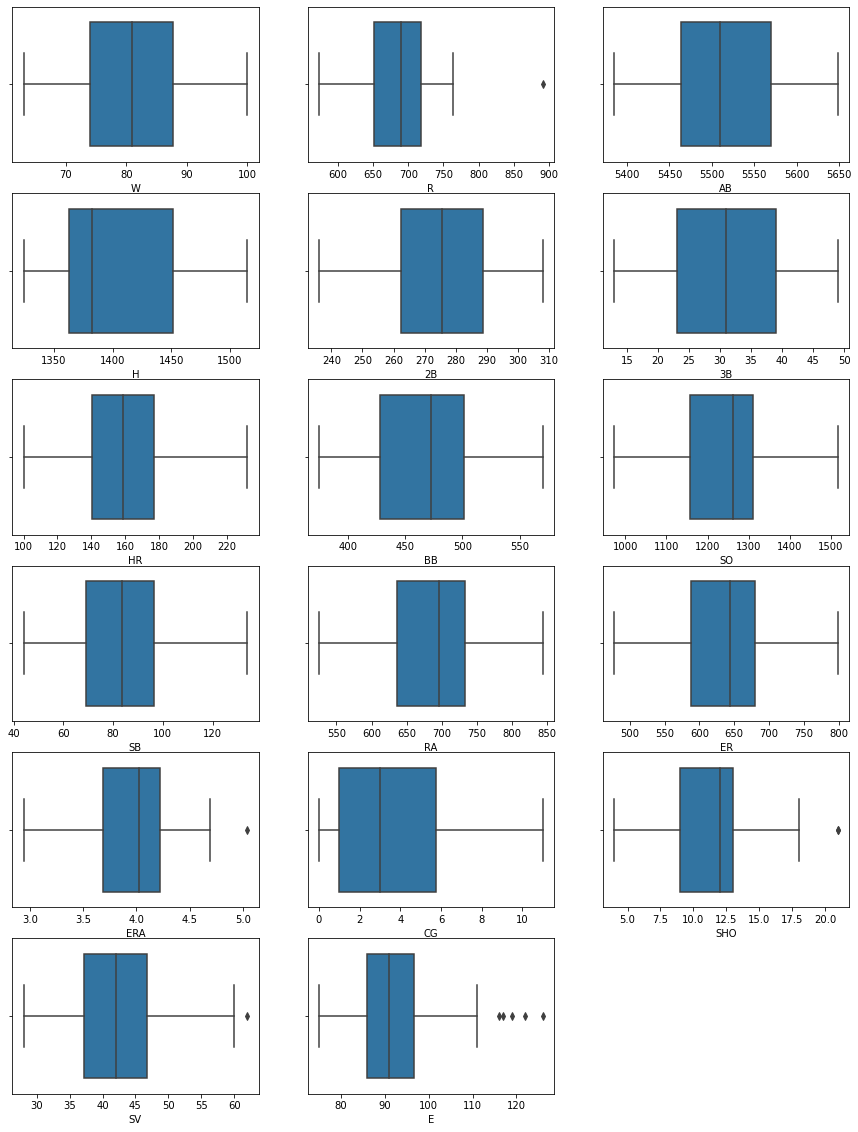

In [10]:
# plotting box plot of all the columns in dataset with for loop
plt.figure(figsize=(15,20))
plotnumber=1

for columns in baseball_data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(baseball_data[columns])
        plt.xlabel(columns, fontsize=10)
    plotnumber+=1
plt.show()

Yeah! we are done with plotting the boxplot here are the results. We discussed 6 columns up there in data description that is 
* Run
* Strikeout
* Complete Games
* Shutouts
* Saves
* Errors

But here we have boxplot showing outliers in
* Run
* Earned Run Average
* Shutouts
* Saves
* Errors

So we didn't metntioned the **EARNED RUN AVERAGE** in outliers but it has outlier and we mentioned **STRIKEOUTS** & **COMPLETE GAMES** as having some outliers but boxplot is showing that the area we thought rightly or leftly skewed in these columns are covered under the 0 to 100% of data.

So Now we have to deal with the outliers, first.

## Removing skewness with Power Transformers

In [32]:
# importing power_transform
from sklearn.preprocessing import power_transform

In [33]:
# let's saperate the features and label
x = baseball_data.drop(columns = 'W')
y = baseball_data['W']

In [34]:
x_new = power_transform(x, method='yeo-johnson')   # yeo johnson method because 0 is present in CG column
x_new = pd.DataFrame(x_new, columns=x.columns)

In [36]:
x = x_new

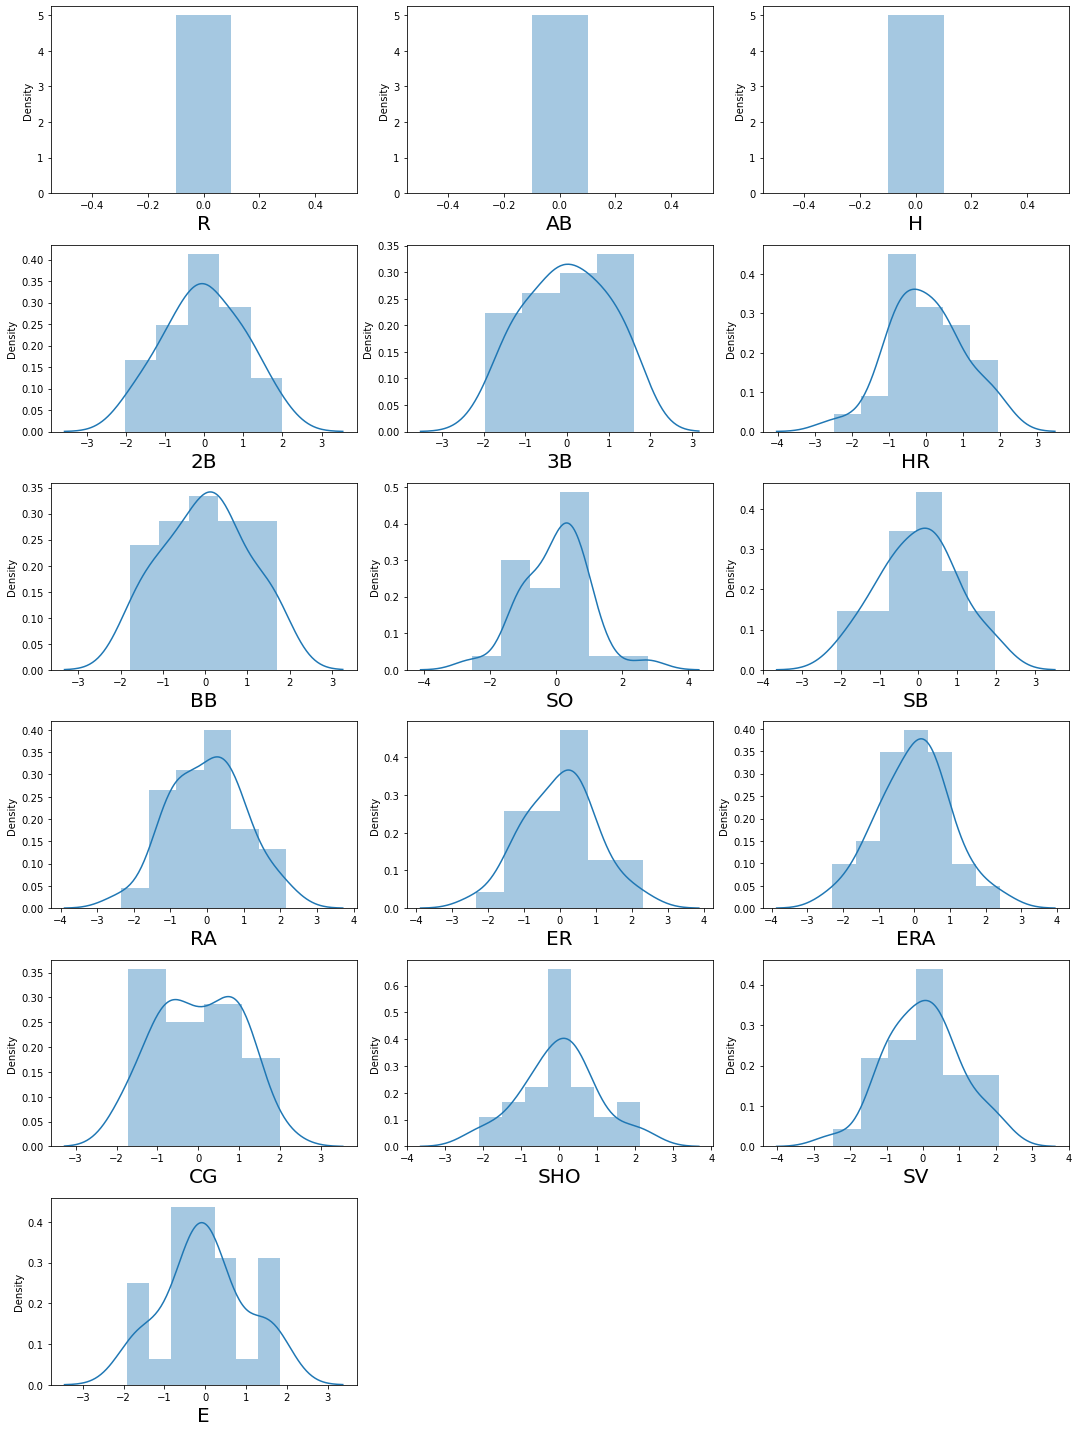

In [37]:
# plotting a distribution plot of all the columns of dataset with for loop
plt.figure(figsize = (15,20))
plotnumber = 1

for column in x:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great! it looks very clear now that data of all the columns are now normally distributed. now we will check for the correlation with features to feature and label with the help of corr() method to check the relationship between features to features and at the same time relation between features to label

### Correlation of data

In [57]:
baseball_data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.664613,0.027707,0.078970,0.501117,-0.060975,0.386591,0.054778,-0.112958,-0.259240,-0.707841,-0.684375,-0.707450,0.000958,0.157447,0.572890,-0.082535
R,0.664613,1.000000,0.469861,0.385690,0.535319,0.114559,0.594316,0.351671,0.121402,-0.025584,-0.212049,-0.187813,-0.227161,-0.007971,-0.048655,0.169558,-0.088541
AB,0.027707,0.469861,1.000000,0.781273,0.494489,0.464465,0.027794,0.069801,-0.091785,0.330095,0.348298,0.393995,0.317000,0.018335,-0.061948,-0.013010,0.163275
H,0.078970,0.385690,0.781273,1.000000,0.545859,0.651514,-0.278711,-0.084576,-0.406969,0.401832,0.203982,0.277340,0.249744,0.198161,0.161967,-0.073774,-0.181437
2B,0.501117,0.535319,0.494489,0.545859,1.000000,0.367722,-0.031140,0.315531,-0.148303,0.176088,-0.239770,-0.250479,-0.293325,0.393197,0.164514,0.249403,-0.042630
3B,-0.060975,0.114559,0.464465,0.651514,0.367722,1.000000,-0.419930,-0.427679,-0.213592,0.557762,0.242080,0.295701,0.278939,0.003651,0.119039,-0.101118,-0.257193
HR,0.386591,0.594316,0.027794,-0.278711,-0.031140,-0.419930,1.000000,0.364324,0.624167,-0.189567,-0.225423,-0.213640,-0.250566,-0.107611,-0.066284,0.143601,0.055023
BB,0.054778,0.351671,0.069801,-0.084576,0.315531,-0.427679,0.364324,1.000000,0.313191,-0.063280,-0.042415,-0.093157,-0.113309,0.356094,-0.051977,-0.101424,0.081413
SO,-0.112958,0.121402,-0.091785,-0.406969,-0.148303,-0.213592,0.624167,0.313191,1.000000,-0.046822,-0.020129,-0.071031,-0.102361,-0.081832,0.141591,-0.131985,0.061607
SB,-0.259240,-0.025584,0.330095,0.401832,0.176088,0.557762,-0.189567,-0.063280,-0.046822,1.000000,0.029920,0.068020,0.046978,-0.014465,0.027137,-0.220894,-0.235427


From above correlation table it can be seen that the relationship between feature to feature and feature to label is quite normal few things to be noticed here is:
* relationship between CG and W is 0.095% which is very less that means CG has not much value in terms of predicting the wins but we will not drop this column right here we will build our model with this data set if there would be less accuracy in our model then we will come here again and will build the model after droping this column

* Relationship between ER to ERA is very high that is 99.42% almost equal to 1 that is quite relatable as both columns are complementry to each other one is Earned Runs and another is Earned run average. so that's okay we will not do anything now first let's build the models then we will see if we can do anything here with them.

* Relationship of RA with ER and ERA is also very high that is 98% with both ER and ERA, these 3 points came into notice and we have noted it down for further use if need.

For now, it looks like our data is ready for model building, so let's build the model!

# Model Building 

We will standardise our feature data for using ```Standard Scaler``` after that we will divide our dataset into train data and test data.

## Preprocessing

### Standard Scaler

In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

Features data has been scaled.

### Finding Best random state

In [41]:
max_accu = 0
best_rs = 0

for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Best accuracy is ',max_accu, 'at random state ', best_rs)

Best accuracy is  0.9194918946841459 at random state  923


We got the best random state for linear regression, now we will build the linear regression model with the best random state what we got.

### creating Train Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 923)

# Model-1 (Linear Regression)

In [43]:
# training the model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [44]:
# checking score on train data
lin_reg.score(x_train,y_train)

0.83286378639043

In [45]:
# checking score on test data
lin_reg.score(x_test,y_test)

0.9194918946841459

In [46]:
# predicting the test data
y_pred_lr = lin_reg.predict(x_test)

In [47]:
# checking r2 score
r2_score(y_test,y_pred_lr)

0.9194918946841459

In [48]:
# mean squared error
mean_squared_error(y_test,y_pred_lr)

11.593167165482981

In [49]:
# checking mean squared error
mean_absolute_error(y_test,y_pred_lr)

2.988615507730384

In [50]:
# checking root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred_lr))

3.4048740307804315

Model accuracy is 91.94% we will regularize this linear regression model and build 2 more models by Ridge regression and Lasso regression and then we will see the accuracy

## Regularization of Linear regression.

### Lasso Regression

In [144]:
# finding the best alpha value
lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [145]:
alpha = lassocv.alpha_
alpha

0.44522386034290673

In [146]:
# building lasso Regression model
lasso_regression = Lasso(alpha)
lasso_regression.fit(x_train,y_train)

Lasso(alpha=0.44522386034290673)

In [147]:
# prediction through lasso regression
y_pred_lasso = lasso_regression.predict(x_test)

In [148]:
r2_score(y_test,y_pred_lasso)

0.8689723771434358

In [149]:
mean_absolute_error(y_test,y_pred_lasso)

3.6185852175650375

In [150]:
mean_squared_error(y_test,y_pred_lasso)

18.86797769134525

In [151]:
np.sqrt(mean_squared_error(y_test,y_pred_lasso))

4.343728547152233

Lasso Regression's model accuracy is 86.89%, decreased from that of linear regression, it might be of overfitting of linear regression let's see

### Ridge Regression

In [60]:
# finding the best alpha value
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.5,0.001), normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.210e-0...
       4.621e-01, 4.631e-01, 4.641e-01, 4.651e-01, 4.661e-01, 4.671e-01,
       4.681e-01, 4.691e-01, 4.701e-01, 4.711e-01, 4.721e-01, 4.731e-01,
       4.741e-01, 4.751e-01, 4.761e-01, 4.771e-01, 4.781e-01, 4.791e-01,
       4.801e-01, 4.811e-01, 4.821e-01, 4.831e-01, 4.841e-01, 4.851e-01,
       4.861e-01, 4.871e-01, 4.881e-01, 4.891e-01, 4.901e-01, 4.911e-01,
       4.921e-01, 4.931e-01, 4.941e-01, 4.951e-01, 4.961e-01, 4.971e-01,
       4.981e-01, 4.991e-01]),
        normalize=True)

In [61]:
ridgecv.alpha_

0.4991

In [62]:
# model training
ridge_regression = Ridge(ridgecv.alpha_)
ridge_regression.fit(x_train,y_train)

Ridge(alpha=0.4991)

In [63]:
# prediction
y_pred_ridge = ridge_regression.predict(x_test)

In [64]:
r2_score(y_test,y_pred_ridge)

0.9057696699595553

In [65]:
mean_squared_error(y_test,y_pred_ridge)

13.569167525824035

In [66]:
mean_absolute_error(y_test,y_pred_ridge)

3.271325019547879

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred_ridge))

3.6836350967249776

Ridge Regression model is complete and has given the accuracy of 90.57% close to linear regression and greater than Lasso Regression

# Polynomial Regression

In [68]:
# importing polynomial features 
from sklearn.preprocessing import PolynomialFeatures

In [73]:
# polynomial featuring the train and test data
poly_reg = PolynomialFeatures(degree = 3)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.fit_transform(x_test)

In [74]:
# training the polynomial featured data in linear regression model
lin_reg.fit(x_train_poly,y_train)

LinearRegression()

In [75]:
y_pred_poly = lin_reg.predict(x_test_poly)

In [76]:
r2_score(y_test,y_pred_poly)

0.7279308897542123

In [78]:
mean_squared_error(y_test,y_pred_poly)

39.17795187539344

In [79]:
mean_absolute_error(y_test,y_pred_poly)

5.168855541289394

In [80]:
np.sqrt(mean_squared_error(y_test,y_pred_poly))

6.259229335580654

# Support Vector Regressor

In [81]:
# importing support vector 
from sklearn.svm import SVR

In [82]:
svr = SVR(kernel = "linear")
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [83]:
y_pred_svr = svr.predict(x_test)

In [84]:
r2_score(y_test,y_pred_svr)

0.8944712947638336

In [85]:
mean_squared_error(y_test,y_pred_svr)

15.19613355400796

In [86]:
mean_absolute_error(y_test,y_pred_svr)

2.8769153563228382

In [87]:
np.sqrt(mean_squared_error(y_test,y_pred_svr))

3.898221845150422

# Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [91]:
y_pred_dt = dec_tree.predict(x_test)

In [92]:
r2_score(y_test,y_pred_dt)

0.5034722222222222

In [94]:
mean_squared_error(y_test,y_pred_dt)

71.5

In [93]:
mean_absolute_error(y_test,y_pred_dt)

6.75

In [95]:
np.sqrt(mean_squared_error(y_test,y_pred_dt))

8.455767262643882

# Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
y_pred_rf = RF.predict(x_test)

In [101]:
r2_score(y_test,y_pred_rf)

0.596087847222222

In [102]:
mean_squared_error(y_test,y_pred_rf)

58.16335000000003

In [103]:
mean_absolute_error(y_test,y_pred_rf)

6.1625

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

7.626490018350514

We have built 7 Regression Machine Learning Algorithm and there score is as follows:-

 * **LinearRegression Model**  Accuracy Score = ```0.9194918946841459```
 * **LassoRegression Model**  Accuracy Score = ```0.8689723771434358```
 * **RidgeRegression Model**  Accuracy Score = ```0.9057696699595553```
 * **PolynomialRegression Model**  Accuracy Score = ```0.7279308897542123```
 * **SupportVectorRegressor Model**  Accuracy Score = ```0.8944712947638336```
 * **DecisionTreeRegressor Model**  Accuracy Score = ```0.5034722222222222```
 * **RandomForestRegressor Model**  Accuracy Score = ```0.596087847222222```
 
All the 7 models have given the accuracy score very differently, out of which the LinearRegression has given the highest accuracy that is 91.94% and DecisionTreeRegressor has given the lowest score that is 50.34%. 

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model.

# cross Validation of the models

In [105]:
from sklearn.model_selection import cross_val_score

In [111]:
# cross validation for Linear Regression
cvs = cross_val_score(lin_reg,x_scaled,y,cv = 5)
print("Cross Validation Score for Linear Regression is ", cvs.mean())

Cross Validation Score for Linear Regression is  -1.4228754457347939


In [112]:
# cross validation for Lasso Regression
cvs = cross_val_score(lasso_regression,x_scaled,y,cv = 5)
print("Cross Validation Score for Lasso Regression is ", cvs.mean())

Cross Validation Score for Lasso Regression is  0.18996467613510812


In [113]:
# cross validation for Ridge Regression
cvs = cross_val_score(ridge_regression,x_scaled,y,cv = 5)
print("Cross Validation Score for Ridge Regression is ", cvs.mean())

Cross Validation Score for Ridge Regression is  0.05106484253342405


In [114]:
# cross validation for Polynomial Regression
cvs = cross_val_score(lin_reg,poly_reg.fit_transform(x_scaled),y,cv = 5)
print("Cross Validation Score for Polynomial Regression is ", cvs.mean())

Cross Validation Score for Polynomial Regression is  -0.6242715839648356


In [116]:
# cross validation for Support vector Regressor
cvs = cross_val_score(svr,x_scaled,y,cv = 5)
print("Cross Validation Score for Support Vector Regressor is ", cvs.mean())

Cross Validation Score for Support Vector Regressior is  0.14846573381850242


In [117]:
# cross validation for decision tree Regressor
cvs = cross_val_score(dec_tree,x_scaled,y,cv = 5)
print("Cross Validation Score for Decision Tree Regressor is ", cvs.mean())

Cross Validation Score for Decision Tree Regressor is  -3.178973265050903


In [118]:
# cross validation for random forest Regressor
cvs = cross_val_score(RF,x_scaled,y,cv = 5)
print("Cross Validation Score for Support Vector Regressor is ", cvs.mean())

Cross Validation Score for Support Vector Regressor is  -0.7711362177069548


We have successfully done with cross validation of all 7 models with **CV = 5** and got the result as follows:-

 * **LinearRegression Model**  Croos Validation Score = ```-1.4228754457347939```
 * **LassoRegression Model**  Croos Validation Score = ```0.18996467613510812```
 * **RidgeRegression Model**  Croos Validation Score = ```0.05106484253342405```
 * **PolynomialRegression Model**  Croos Validation Score = ```-0.6242715839648356```
 * **SupportVectorRegressor Model**  Croos Validation Score = ```0.14846573381850242```
 * **DecisionTreeRegressor Model**  Croos Validation Score = ```-3.178973265050903```
 * **RandomForestRegressor Model**  Croos Validation Score = ```-0.7711362177069548```
 
After checking the cross validation score it can be seen that some of models are giving negative cross validation score and those model which have positive score are very less but we have to check for the minimum difference between ```r2_score``` and ```cross_val_score```, and whichever model has the minimum difference between ```r2_score``` and ```cross_val_score``` would be the best model. So to check that I have counted the difference of both on a excel sheet. The result is as follows:


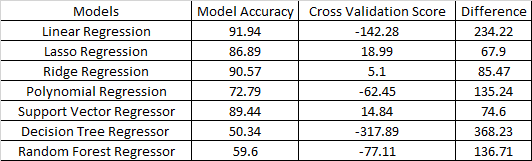

from this table we can see that Lasso Regression model has the minimum difference between ```r2_score``` and ```cross_val_score``` that is 67.9. So according to this theory our best fit model is Lasso Regression. Now we will tune the parameters of LassoRegression to see if we can further increase the model score or not.

# Hyper parameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameters = {'alpha': np.arange(0.001,1.0,0.01),
              'selection' : ['cyclic', 'random'],
              'fit_intercept' : ['True', 'False'],
              'normalize' : ['True', 'False'],
              'max_iter' : [500,750,1000,1250,1500,1750,2000]
             }

In [129]:
grid_search = GridSearchCV(lasso_regression, param_grid = parameters)

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=0.44522386034290673),
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.4...
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
                         'fit_intercept': ['True', 'False'],
                         'max_iter': [500, 750, 1000, 1250, 1500, 1750, 2000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [131]:
grid_search.best_params_

{'alpha': 0.5309999999999999,
 'fit_intercept': 'False',
 'max_iter': 1500,
 'normalize': 'False',
 'selection': 'random'}

In [140]:
lasso = grid_search.best_estimator_

In [141]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.5309999999999999, fit_intercept='False', max_iter=1500,
      normalize='False', selection='random')

In [142]:
y_pred_l1 = lasso_regression.predict(x_test)

In [143]:
r2_score(y_test, y_pred_l1)

0.6799108629272397

We have done with the Hyper Parameter Tuning of Lasso Regression but it did not do well in terms of increasing the r2_score of the model the model accuracy has been decreased after hyperparameter tuning so we will finalize the previous model what we built initially.

# Model Saving

In [152]:
import pickle

In [153]:
file_name = 'BAseball_win_prediction.pickle'
pickle.dump(lasso_regression,open(file_name,'wb'))

Model has been saved successfully. Let's check by predicting with the loaded model

# Loading and predicting with the loaded model

In [154]:
# loading the saved model
loaded_model = pickle.load(open(file_name,'rb'))

In [155]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)

In [165]:
# making dataframe
conclusion = pd.DataFrame({})
conclusion['Predictions'] = predictions
conclusion['Actual'] = y_pred_lasso
conclusion

,Predictions,Actual
0,75.243306,75.243306
1,87.208014,87.208014
2,80.033309,80.033309
3,79.702682,79.702682
4,98.643383,98.643383
5,93.070746,93.070746
6,66.700593,66.700593
7,74.478574,74.478574


# Finished

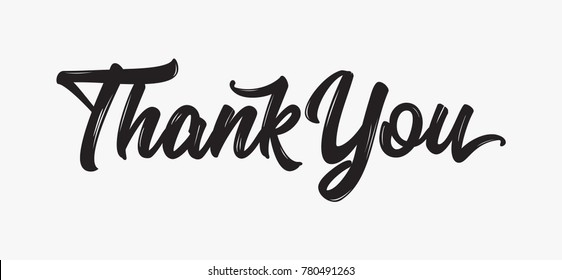